In [6]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Step 1: Convert the TXT file to CSV
input_txt_file = "data_july_02_ku.txt"
output_csv_file = "data_july_02_ku.csv"

In [8]:
# Define the header for the CSV file
header = [
    "DateTime", "StepIndex", "StepHeading", "StepDistanceX", "StepDistanceY", "StepDistance",
    "StepTime", "StepAmplitude", "StepDutyCycle", "StepRatio", "Altitude", "Confidence",
    "AltitudeOffset", "BatteryLevel", "RawGyroX", "RawGyroY", "RawGyroZ", "RawAccelX",
    "RawAccelY", "RawAccelZ", "RawCompassX", "RawCompassY", "RawCompassZ",
    "CorrectedGyroX", "CorrectedGyroY", "CorrectedGyroZ", "CorrectedAccelX",
    "CorrectedAccelY", "CorrectedAccelZ", "CorrectedCompassX", "CorrectedCompassY",
    "CorrectedCompassZ", "LinearAccelX", "LinearAccelY", "LinearAccelZ"
]


In [9]:

# Open the input and output files
with open(input_txt_file, "r") as f_in, open(output_csv_file, "w", newline="") as f_out:
    # Create a CSV writer object
    writer = csv.writer(f_out)
    
    # Write the header row
    writer.writerow(header)
    
    # Read each line from the input file
    for line in f_in:
        # Split the line by spaces
        parts = line.strip().split()
        
        # Extract date and time
        date_parts = parts[0].split("/")
        time_parts = parts[1].split(":")
        
        # Ensure date and time parts are valid
        if len(date_parts) == 3 and len(time_parts) == 3:
            # Combine date and time into proper format
            date_time = f"{date_parts[0]}/{date_parts[1]}/{date_parts[2]} {time_parts[0]}:{time_parts[1]}:{time_parts[2]}"
            
            # Extract the rest of the data
            data = parts[2:]
            
            # Split the data separated by commas into separate columns
            new_data = []
            for item in data:
                new_data.extend(item.split(","))
            
            # Combine date, time, and remaining data into a single row
            row = [date_time] + new_data
            
            # Write the row to the CSV file
            writer.writerow(row)
        else:
            print("Skipping invalid line:", line)

print("CSV conversion completed.")

Skipping invalid line: # Data format: "%int(Month)/%int(Day)/%int(Year) %int(Hours):%int(Minutes):%float(Seconds) %float(StepIndex),%float(StepHeading),%float(StepDistanceX),%float(StepDistanceY),%float(StepDistance),%float(StepTime),%float(StepAmplitude),%float(StepDutyCucle),%float(StepRatio),%float(Altitude),%float(Confidence),%float(AltitudeOffset) %int(BatteryLevel) %float(RawGyroX),%float(RawGyroY),%float(RawGyroZ) %float(RawAccelX),%float(RawAccelY),%float(RawAccelZ) %float(RawCompassX),%float(RawCompassY),%float(RawCompassZ) %float(CorrectedGyroX),%float(CorrectedGyroY),%float(CorrectedGyroZ) %float(CorrectedAccelX),%float(CorrectedAccelY),%float(CorrectedAccelZ) %float(CorrectedCompassX),%float(CorrectedCompassY),%float(CorrectedCompassZ) %float(LinearAccelX),%float(LinearAccelY),%float(LinearAccelZ)"

CSV conversion completed.


In [1]:
import pandas as pd
# Step 2: Read the CSV file and process the trajectory data
input_csv_file = "data_july_02_kush.csv"
data_pd = pd.read_csv(input_csv_file)
#input_csv_file = "data.csv"
# Create lists to store trajectory points
trajectory_x = [0]
trajectory_y = [0]
step_x_arr = []
step_y_arr = []
trajectory_heading = []
# Initialize position variables
x_position = 0
y_position = 0
total_distance = 0

In [3]:
data_pd.iloc[-1]  #Khushi data starts 16:41:31, edited:starts 16:45:53.753513 ends: 17:15:19.935499  # naveens data start:16:42:35 end:17:14:38

DateTime             07/02/24 17:15:19.935499
StepIndex                                 0.0
StepHeading                               0.0
StepDistanceX                             0.0
StepDistanceY                             0.0
StepDistance                              0.0
StepTime                                  0.0
StepAmplitude                             0.0
StepDutyCycle                             0.0
StepRatio                                 0.0
Altitude                                  0.0
Confidence                                0.0
AltitudeOffset                            0.0
BatteryLevel                               99
RawGyroX                              0.00213
RawGyroY                             -0.00532
RawGyroZ                             -0.01171
RawAccelX                            -0.28033
RawAccelY                            -0.04065
RawAccelZ                             0.95258
RawCompassX                             0.255
RawCompassY                       

In [7]:
# Slice the DataFrame
sliced_df = data_pd.iloc[6000:46300] 

# Save the sliced DataFrame to a CSV file
sliced_df.to_csv('data_july_02_kush.csv', index=False)


In [20]:
#data_pd.iloc[-1]#22;15

In [8]:
import pandas as pd

# Define the input and output file paths
input_file = 'data_july_02_kush.csv'
output_file = 'data_july_02_kush_proc.csv'

# Read the CSV file
data = pd.read_csv(input_file)

# Convert the DateTime column to datetime
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Calculate the time in seconds from the first timestamp
data['Time (S)'] = (data['DateTime'] - data['DateTime'].iloc[0]).dt.total_seconds()

# Select the required columns and rename them
result = data[['Time (S)', "CorrectedGyroX", "CorrectedGyroY", "CorrectedGyroZ", "CorrectedAccelX", "CorrectedAccelY", "CorrectedAccelZ","CorrectedCompassX", "CorrectedCompassY","CorrectedCompassZ"]]
result.columns = ['Time (S)', 'Gyroscope X (deg/s)', 'Gyroscope Y (deg/s)', 'Gyroscope Z (deg/s)', 'Accelerometer X (g)', 'Accelerometer Y (g)', 'Accelerometer Z (g)', 'Magnetometer X','Magnetometer Y','Magnetometer Z']

#result_sliced = result.iloc[1400:-1300]
# Save the result to a new CSV file
result.to_csv(output_file, index=False)

print(f'Processed data saved to {output_file}')

Processed data saved to data_july_02_kush_proc.csv


In [2]:
result.iloc[0]

NameError: name 'result' is not defined

In [ ]:
1713-100

In [35]:
# Open the CSV file and read data
with open(input_csv_file, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    #print('length: ',len(reader))
    for row in reader:
        # Extract parameters from each row
        step_heading = float(row['StepHeading'])
        step_distance_x = float(row['StepDistanceX'])
        step_distance_y = float(row['StepDistanceY'])
        step_distance = float(row['StepDistance'])

        # Calculate displacement components along X and Y axes
        displacement_x = step_distance_x #* step_distance
        displacement_y = step_distance_y #* step_distance
        
        # Update position
        x_position += displacement_x
        y_position += displacement_y
        
        # Add new position to trajectory
        trajectory_x.append(x_position)
        trajectory_y.append(y_position)
        step_x_arr.append(step_distance_x)
        step_y_arr.append(step_distance_y)
        trajectory_heading.append(step_heading)
        # Update total distance walked
        total_distance += step_distance

In [7]:
len(trajectory_x)

38894

In [69]:
# final on tuesday
arr = [(712, 590), (703, 562), (684, 511), (641, 495), (601, 489), (557, 494), (553, 540), (525, 569), (489, 577), (459, 609), (409, 641), (374, 643), (336, 643), (286, 643), (242, 633), (232, 581), (237, 542), (234, 485), (232, 426), (229, 382), (228, 342), (228, 298), (223, 259), (270, 243), (320, 244), (374, 248), (426, 243), (426, 199), (421, 151), (462, 133), (503, 129), (552, 127), (610, 128), (653, 129), (703, 129), (741, 132), (782, 139), (778, 173), (779, 215), (778, 265), (775, 318), (774, 348), (773, 383), (775, 430), (776, 482), (778, 538)]
arr_gt = np.array(arr)
arr_gt

array([[712, 590],
       [703, 562],
       [684, 511],
       [641, 495],
       [601, 489],
       [557, 494],
       [553, 540],
       [525, 569],
       [489, 577],
       [459, 609],
       [409, 641],
       [374, 643],
       [336, 643],
       [286, 643],
       [242, 633],
       [232, 581],
       [237, 542],
       [234, 485],
       [232, 426],
       [229, 382],
       [228, 342],
       [228, 298],
       [223, 259],
       [270, 243],
       [320, 244],
       [374, 248],
       [426, 243],
       [426, 199],
       [421, 151],
       [462, 133],
       [503, 129],
       [552, 127],
       [610, 128],
       [653, 129],
       [703, 129],
       [741, 132],
       [782, 139],
       [778, 173],
       [779, 215],
       [778, 265],
       [775, 318],
       [774, 348],
       [773, 383],
       [775, 430],
       [776, 482],
       [778, 538]])

In [56]:
arr = [(718, 596), (698, 551), (664, 519), (628, 513), (586, 508), (542, 526), (478, 568), (451, 620), (391, 644), (330, 646), (267, 645), (147, 585), (140, 490), (227, 419), (222, 356), (220, 292), (216, 239), (213, 144), (299, 138), (375, 131), (449, 128), (544, 125), (626, 124), (770, 124), (778, 182), (774, 230), (772, 284), (771, 328), (770, 364), (771, 404), (773, 455), (774, 514), (771, 565)]
arr_gt = np.array(arr)
arr_gt

array([[718, 596],
       [698, 551],
       [664, 519],
       [628, 513],
       [586, 508],
       [542, 526],
       [478, 568],
       [451, 620],
       [391, 644],
       [330, 646],
       [267, 645],
       [147, 585],
       [140, 490],
       [227, 419],
       [222, 356],
       [220, 292],
       [216, 239],
       [213, 144],
       [299, 138],
       [375, 131],
       [449, 128],
       [544, 125],
       [626, 124],
       [770, 124],
       [778, 182],
       [774, 230],
       [772, 284],
       [771, 328],
       [770, 364],
       [771, 404],
       [773, 455],
       [774, 514],
       [771, 565]])

In [67]:
for arr_ in arr_gt:
    print(arr_[1])

596
551
519
513
508
526
568
620
644
646
645
585
490
419
356
292
239
144
138
131
128
125
124
124
182
230
284
328
364
404
455
514
565


In [58]:
np.save("ground_truth_jun_28_notscaled.npy", arr_gt)

In [60]:
arr_gt.shape

(33, 2)

In [63]:
dist_between_them_inch = np.array([84, 84, 115, 120, 118, 150, 171, 172, 166, 139, 369, 190, 142, 301, 221, 190, 200, 223, 235, 190, 182, 226, 219, 117, 126, 88, 137, 94, 62, 149, 128, 102])
dist_between_them_metre = 0.0254*dist_between_them_inch
dist_between_them_metre

array([2.1336, 2.1336, 2.921 , 3.048 , 2.9972, 3.81  , 4.3434, 4.3688,
       4.2164, 3.5306, 9.3726, 4.826 , 3.6068, 7.6454, 5.6134, 4.826 ,
       5.08  , 5.6642, 5.969 , 4.826 , 4.6228, 5.7404, 5.5626, 2.9718,
       3.2004, 2.2352, 3.4798, 2.3876, 1.5748, 3.7846, 3.2512, 2.5908])

In [68]:
dist_between_them_metre*0.5*825/33.4772

array([ 26.28983308,  26.28983308,  35.99203338,  37.5569044 ,
        36.93095599,  46.9461305 ,  53.51858877,  53.83156297,
        51.95371775,  43.50341426, 115.48748103,  59.46509863,
        44.44233687,  94.2052352 ,  69.16729894,  59.46509863,
        62.59484067,  69.79324734,  73.54893778,  59.46509863,
        56.96130501,  70.73216995,  68.54135053,  36.61798179,
        39.43474962,  27.54172989,  42.87746586,  29.41957511,
        19.40440061,  46.6331563 ,  40.06069803,  31.92336874])

In [ ]:
AveErr = np.mean(Err) * 33.4772/(955 - 130) # Change it into the meter

In [64]:
AveErr = np.mean(Err) * 33.4772/825 # Change it into the meter

825

In [51]:
data_pd.iloc[800]

DateTime             06/28/24 17:40:07.303881
StepIndex                                 2.0
StepHeading                            221.56
StepDistanceX                        -0.57167
StepDistanceY                        -0.50684
StepDistance                            0.764
StepTime                                0.715
StepAmplitude                           0.131
StepDutyCycle                           0.497
StepRatio                               0.118
Altitude                            243.24365
Confidence                              66.34
AltitudeOffset                       -0.80315
BatteryLevel                               87
RawGyroX                             -0.01384
RawGyroY                              0.00958
RawGyroZ                              0.01916
RawAccelX                            -0.31537
RawAccelY                            -0.18896
RawAccelZ                              0.9115
RawCompassX                           -0.0855
RawCompassY                       

In [69]:
# Reflect points across X-axis
#reference_y = 2 * max(trajectory_y)  # Reference value
# trajectory_y_reflected = [reference_y - y for y in trajectory_y]

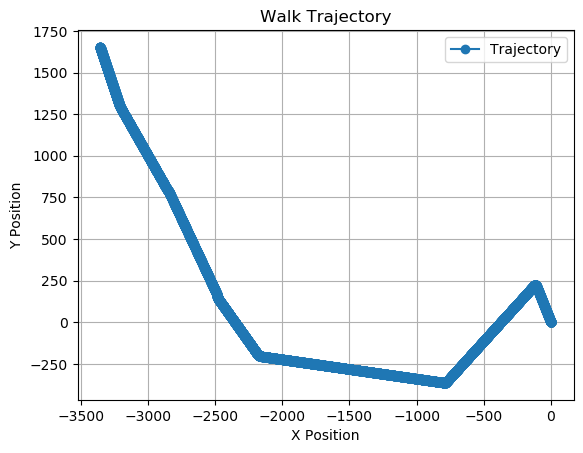

In [8]:
# Plot trajectory
s=7000
#plt.plot(trajectory_x, trajectory_y, marker='o', label='Trajectory')
plt.plot(trajectory_x[:s], trajectory_y[:s], marker='o', label='Trajectory')
#plt.plot(trajectory_x[:s], label='Trajectory_x')
#plt.plot(trajectory_y_reflected[:s], label='Trajectory_y')
# Display total distance on plot
#plt.text(0, reference_y * 1.05, f'Total Distance: {total_distance:.2f} meters', fontsize=10, ha='center')

plt.title('Walk Trajectory')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.legend()
plt.show()

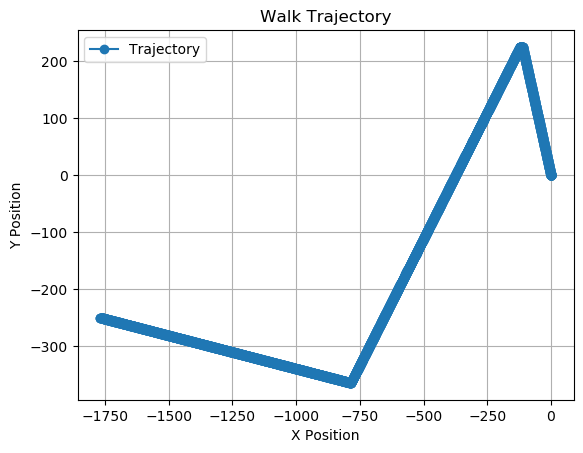

In [9]:
# Plot trajectory
s=3000
#plt.plot(trajectory_x, trajectory_y, marker='o', label='Trajectory')
plt.plot(trajectory_x[:s], trajectory_y[:s], marker='o', label='Trajectory')
#plt.plot(trajectory_x[:s], label='Trajectory_x')
#plt.plot(trajectory_y_reflected[:s], label='Trajectory_y')
# Display total distance on plot
#plt.text(0, reference_y * 1.05, f'Total Distance: {total_distance:.2f} meters', fontsize=10, ha='center')

plt.title('Walk Trajectory')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.legend()
plt.show()

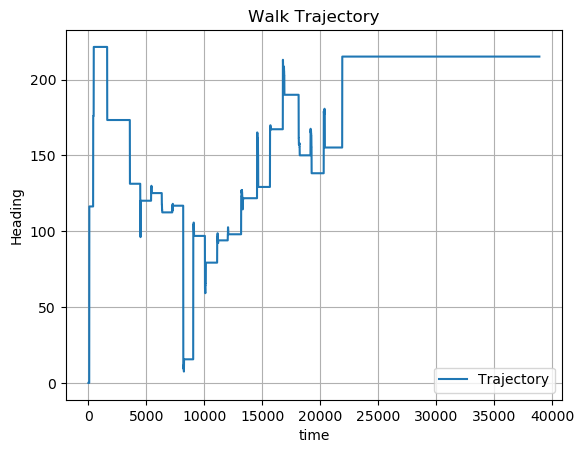

In [10]:
plt.plot(np.array(trajectory_heading), label='Trajectory')

plt.title('Walk Trajectory')
plt.xlabel('time')
plt.ylabel('Heading')
plt.grid(True)
plt.legend()
plt.show()

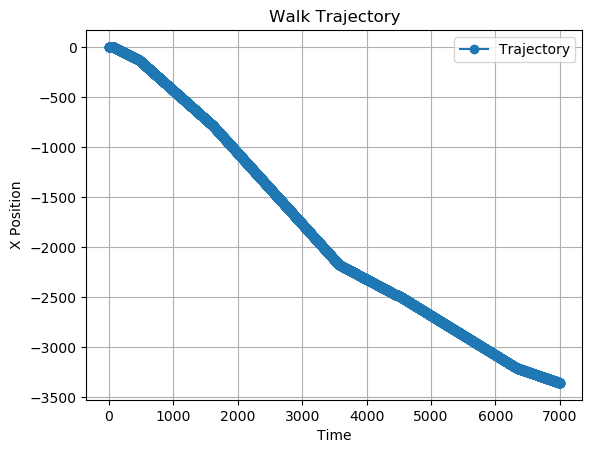

In [11]:
plt.plot(trajectory_x[:7000], marker='o', label='Trajectory')
#plt.plot(trajectory_x[:s], label='Trajectory_x')
#plt.plot(trajectory_y_reflected[:s], label='Trajectory_y')
# Display total distance on plot
#plt.text(0, reference_y * 1.05, f'Total Distance: {total_distance:.2f} meters', fontsize=10, ha='center')

plt.title('Walk Trajectory')
plt.xlabel('Time')
plt.ylabel('X Position')
plt.grid(True)
plt.legend()
plt.show()

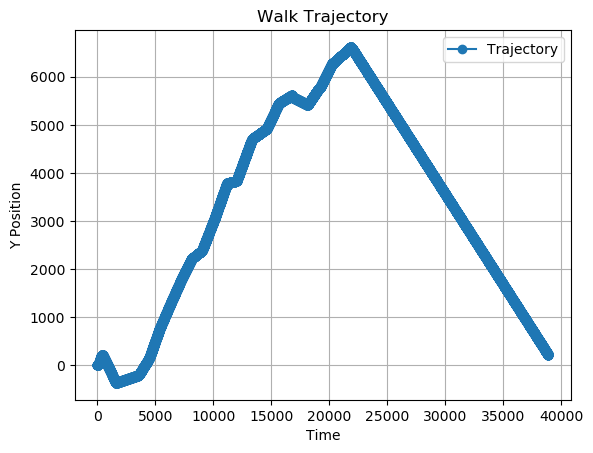

In [12]:
plt.plot(trajectory_y, marker='o', label='Trajectory')
#plt.plot(trajectory_x[:s], label='Trajectory_x')
#plt.plot(trajectory_y_reflected[:s], label='Trajectory_y')
# Display total distance on plot
#plt.text(0, reference_y * 1.05, f'Total Distance: {total_distance:.2f} meters', fontsize=10, ha='center')

plt.title('Walk Trajectory')
plt.xlabel('Time')
plt.ylabel('Y Position')
plt.grid(True)
plt.legend()
plt.show()

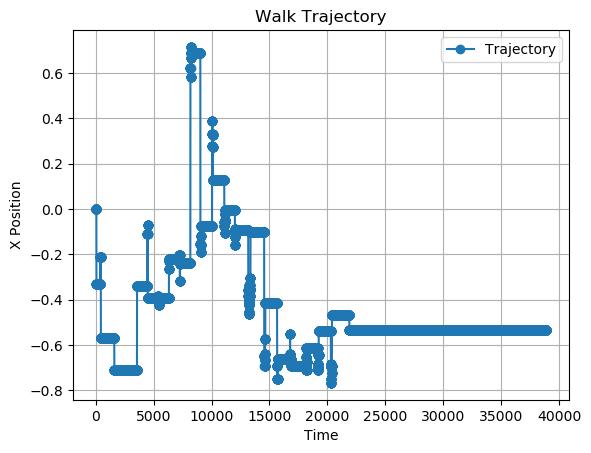

In [13]:
plt.plot(step_x_arr, marker='o', label='Trajectory')
#plt.plot(trajectory_x[:s], label='Trajectory_x')
#plt.plot(trajectory_y_reflected[:s], label='Trajectory_y')
# Display total distance on plot
#plt.text(0, reference_y * 1.05, f'Total Distance: {total_distance:.2f} meters', fontsize=10, ha='center')

plt.title('Walk Trajectory')
plt.xlabel('Time')
plt.ylabel('X Position')
plt.grid(True)
plt.legend()
plt.show()

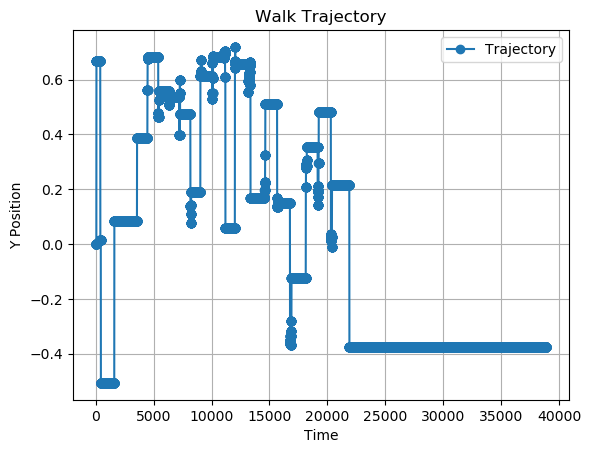

In [14]:
plt.plot(step_y_arr, marker='o', label='Trajectory')
#plt.plot(trajectory_x[:s], label='Trajectory_x')
#plt.plot(trajectory_y_reflected[:s], label='Trajectory_y')
# Display total distance on plot
#plt.text(0, reference_y * 1.05, f'Total Distance: {total_distance:.2f} meters', fontsize=10, ha='center')

plt.title('Walk Trajectory')
plt.xlabel('Time')
plt.ylabel('Y Position')
plt.grid(True)
plt.legend()
plt.show()